# Linear Regression, hypothesis testing, p-value, ANOVA

- **distribution concept**:

https://www.youtube.com/watch?v=EOlNb1XXC_M&list=RDCMUCYgL81lc7DOLNhnel1_J6Vg&index=2

- **t and z distributions**:

t-distribution (sample size n <= 30 and unknown population std)

z-distribution (sample size n > 30 or population known std)


https://www.google.com/search?rlz=1C5CHFA_enUS909US909&ei=nbcqYLnzO4-UtAaYvJ_AAQ&q=t+distribution&oq=t+distribution&gs_lcp=Cgdnd3Mtd2l6EAMyBwgAELEDEEMyBAgAEEMyBAgAEEMyBAgAEEMyBAgAEEMyBAgAEEMyBAgAEEMyAggAMgQIABBDMgQIABBDOgcIABCwAxBDOgoIABCxAxCDARBDOgYIABAHEB46CAgAELEDEJECOgQIABAKUPFwWOh8YK9_aAFwAngAgAGYAYgBjASSAQMyLjOYAQCgAQGqAQdnd3Mtd2l6yAEKwAEB&sclient=gws-wiz&ved=0ahUKEwj5tZmCvezuAhUPCs0KHRjeBxgQ4dUDCA0&uact=5




- **null and alternative hypothesis**:

https://www.youtube.com/watch?v=_Qlxt0HmuOo&list=RDCMUCYgL81lc7DOLNhnel1_J6Vg&index=6


- **hypothesis testing-test statistics**:

https://www.youtube.com/watch?v=KTFm7El1NBs


https://www.youtube.com/watch?v=80YzzIm8NK8&list=RDCMUCYgL81lc7DOLNhnel1_J6Vg&index=3


- **p-value**:

https://www.youtube.com/watch?v=KLnGOL_AUgA&t=960s


https://www.youtube.com/watch?v=5FmxvmlOmfA


- **ANOVA**:

https://www.youtube.com/watch?v=CS_BKChyPuc&list=RDCMUCYgL81lc7DOLNhnel1_J6Vg&index=8


- **practical exercise**:

z vs t distributions:

https://www.youtube.com/watch?v=YsalXF5POtY&list=RDCMUC5mq4Ywd0lPPQJnK_5gq-yA&index=5


confidence interval:

https://www.youtube.com/watch?v=lwpobQmUTd8&list=RDCMUC5mq4Ywd0lPPQJnK_5gq-yA&index=3

1-tail test:

https://www.youtube.com/watch?v=lNoxKsuJ6Xc&list=RDCMUC5mq4Ywd0lPPQJnK_5gq-yA&start_radio=1&t=16

2-tails test:

https://www.youtube.com/watch?v=0XXT3bIY_pw&list=RDCMUC5mq4Ywd0lPPQJnK_5gq-yA&index=2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
boston_dataset = datasets.load_boston()

In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
X_df = pd.DataFrame(boston_dataset.data)
X_fn = boston_dataset.feature_names
X_df.columns = X_fn

X_df = X_df.drop(['CHAS'], axis = 1)

y_df = pd.DataFrame(boston_dataset.target)
y_df.columns = ['MEDV']


In [6]:
X_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
y_df

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# 1. Data Preprocessing 

In [8]:
# check missing values

np.where(np.array(X_df.isna()) == True)

np.where(np.array(y_df.isna()) == True)

(array([], dtype=int64), array([], dtype=int64))

<AxesSubplot:>

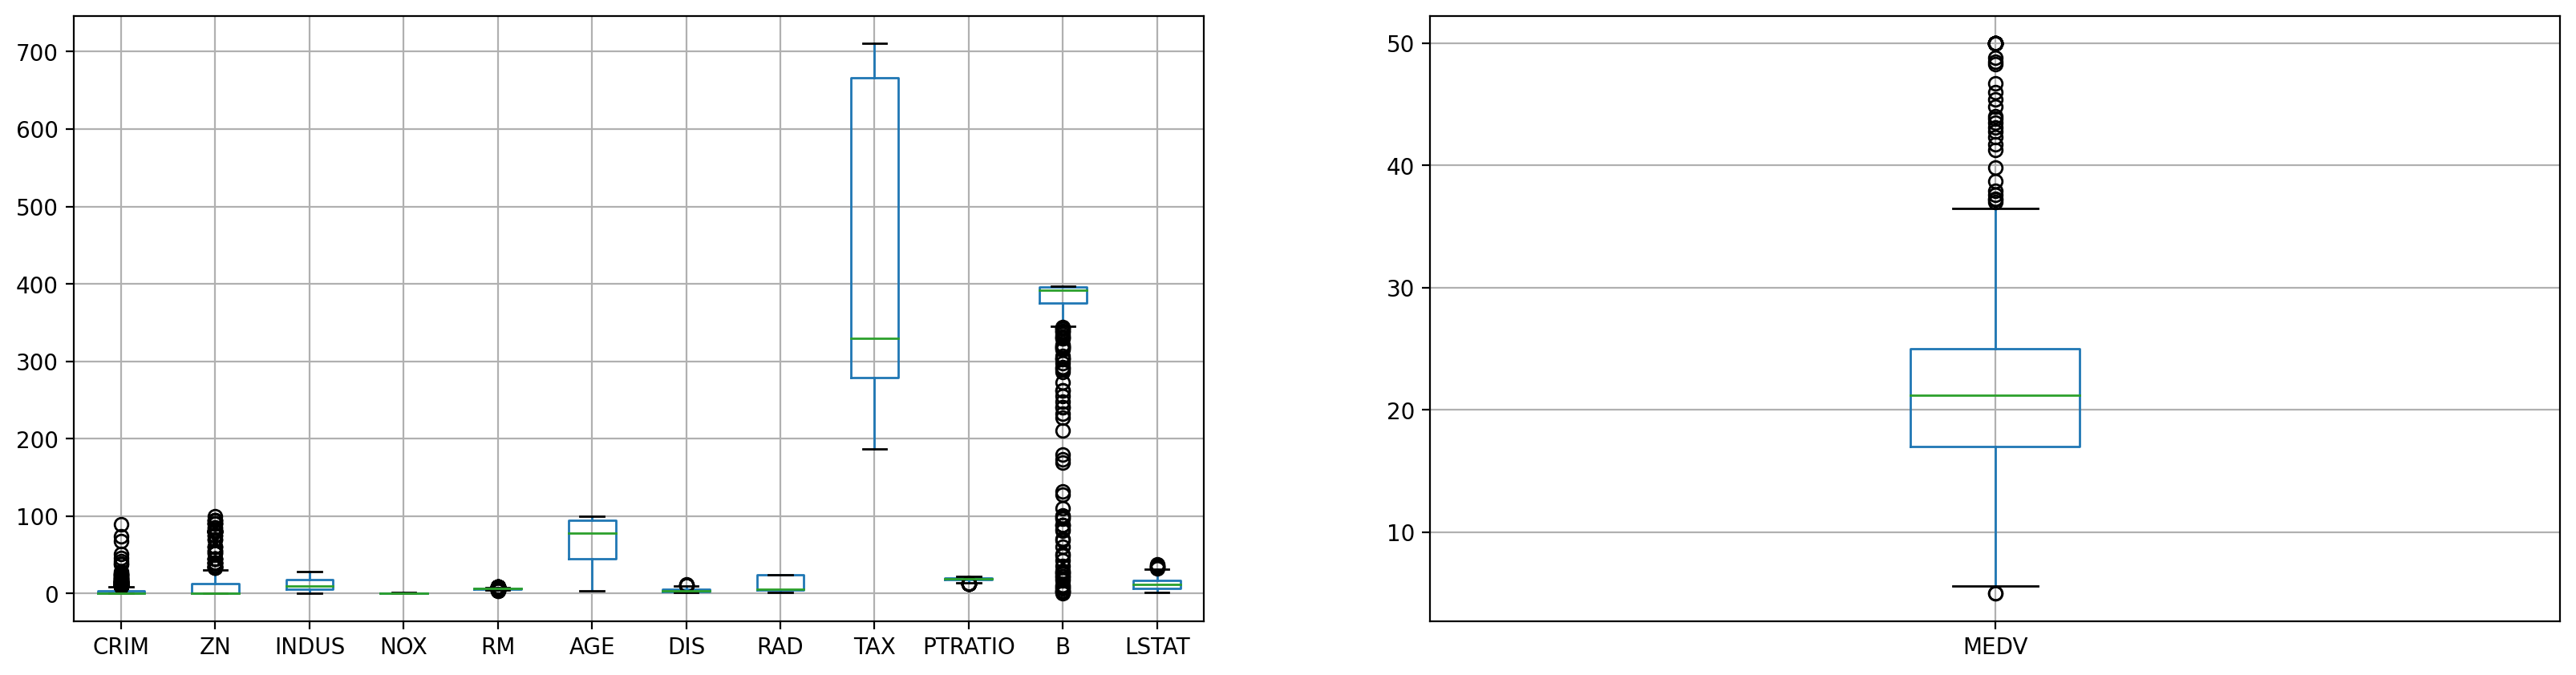

In [9]:
# check features distribution before scaling

fig = plt.figure(figsize = (20,5), dpi = 200)

ax = fig.add_subplot(1,2,1)
X_df.boxplot()

ax = fig.add_subplot(1,2,2)
y_df.boxplot()

In [10]:
# features scaling

X_sc = StandardScaler()

X_scaled = X_sc.fit_transform(X_df.values)

X_df_scaled = pd.DataFrame(X_scaled)

X_df_scaled.columns = X_df.columns

In [11]:
X_df_scaled

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


<AxesSubplot:>

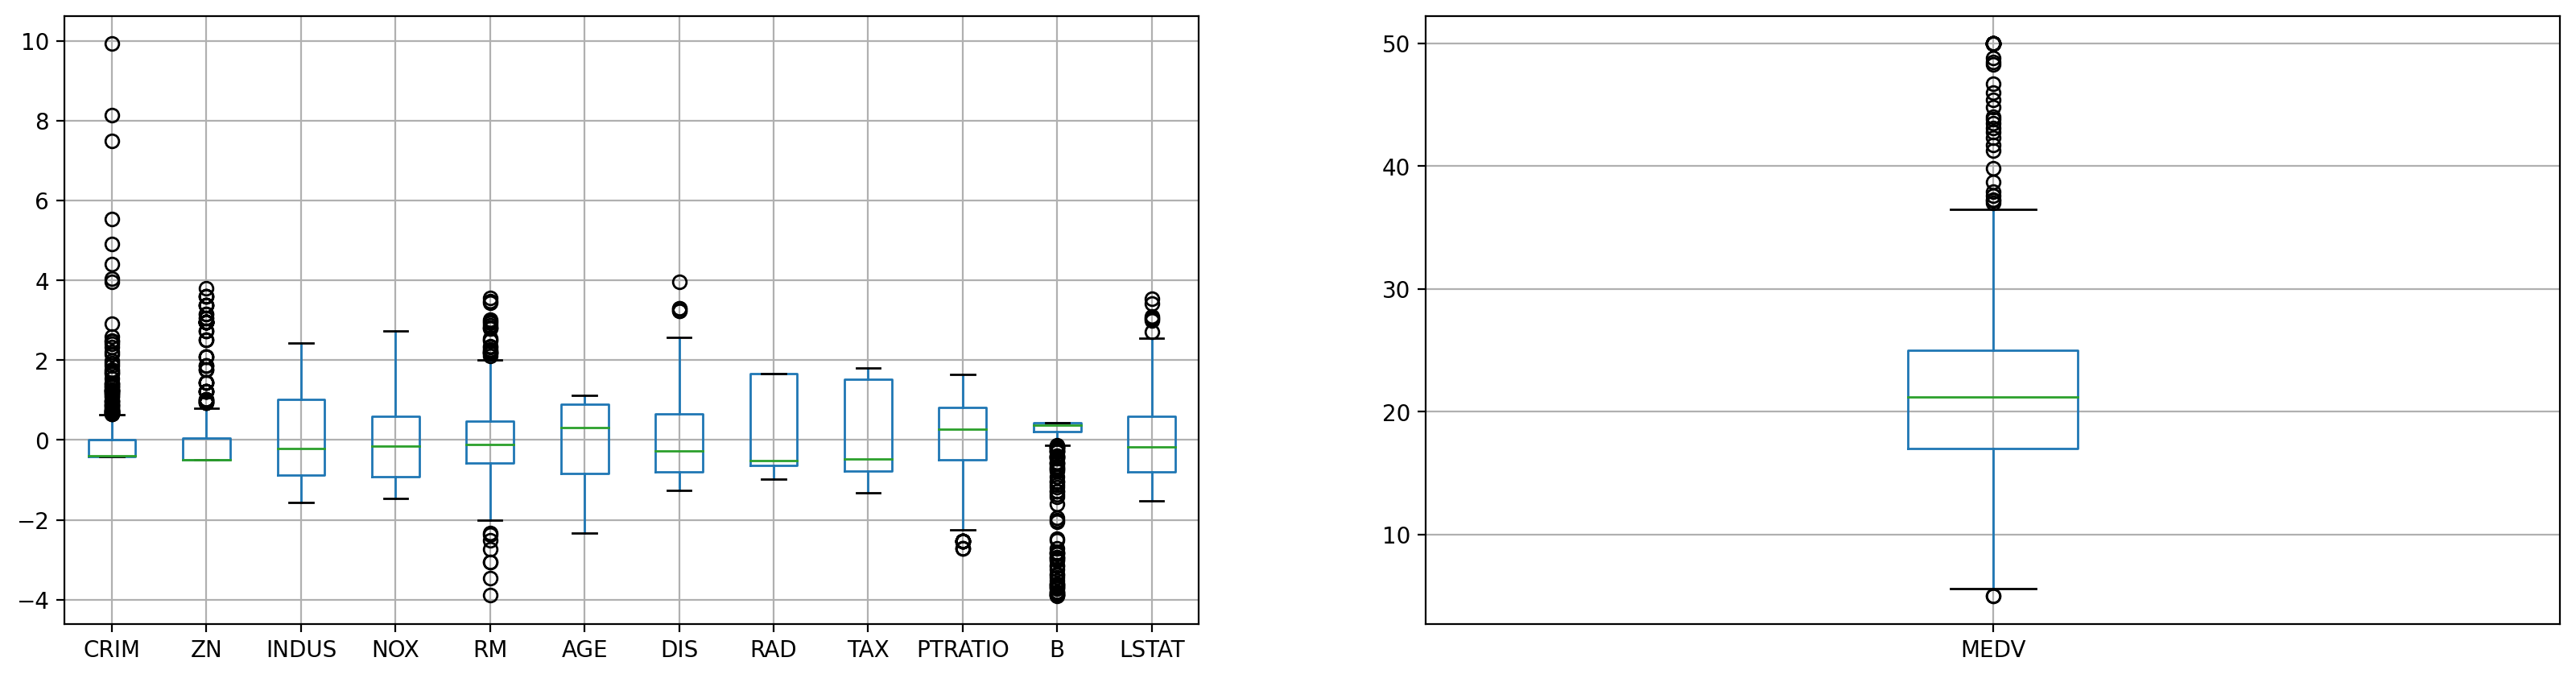

In [12]:
# features distribution after scaling

fig = plt.figure(figsize = (20,5), dpi = 200)

ax = fig.add_subplot(1,2,1)
X_df_scaled.boxplot()

ax = fig.add_subplot(1,2,2)
y_df.boxplot()

In [13]:
# function to remove the outliers from the dataset (data which fall outside of the whiskers in the box plot)
# the outliers are removed for each feature separately. It can happen that data that are outliers
# for a certain feature are not outliers for another feature. 
# The threshold to consider data outliers or not is defined by q. 

# upper quartile or 75h percentile (Q3): value for which 75% of the data are less than this value (upper threshold of the box)
# lower quartile or 25th percentile (Q1): value for which 25% of the data are less than this value (lower theshold of the box)
# iqr: distance between the upper and lower quartile: Q3 - Q1

# upper whisker: Q3 + q*iqr
# lower whisler: Q1 - q*iqr

# data > upper whisker or < lower whisker : outliers

# q controls the amount of data to consider as outliers

def get_remove_outliers(X_df,y_df,q):
    
    data = np.column_stack((X_df.values,y_df.values))
    
    for j in range(data.shape[1]):
    
        median = np.median(data[:,j])
        
        upper_quartile = np.percentile(data[:,j], 75)
        lower_quartile = np.percentile(data[:,j], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = (data[:,j][data[:,j] <= upper_quartile + q * iqr]).max()
        lower_whisker = (data[:,j][data[:,j] >= lower_quartile - q * iqr]).min()
        
        data_clean = data[data[:,j] <= upper_whisker]
        data_clean = data_clean[data_clean[:,j] >= lower_whisker]
        
        data = data_clean
        
        
    X_df_clean = pd.DataFrame(data_clean[:,:data_clean.shape[1] - 1])
    X_df_clean.columns = X_df.columns
    
    y_df_clean = pd.DataFrame(data_clean[:,data_clean.shape[1] - 1])
    y_df_clean.columns = y_df.columns
    
    return X_df_clean,y_df_clean

In [44]:
# cleaning the dataset by removing outliers of each feature and target

q = 3

X_df_scaled_clean, y_df_clean = get_remove_outliers(X_df_scaled,y_df, q)

<AxesSubplot:>

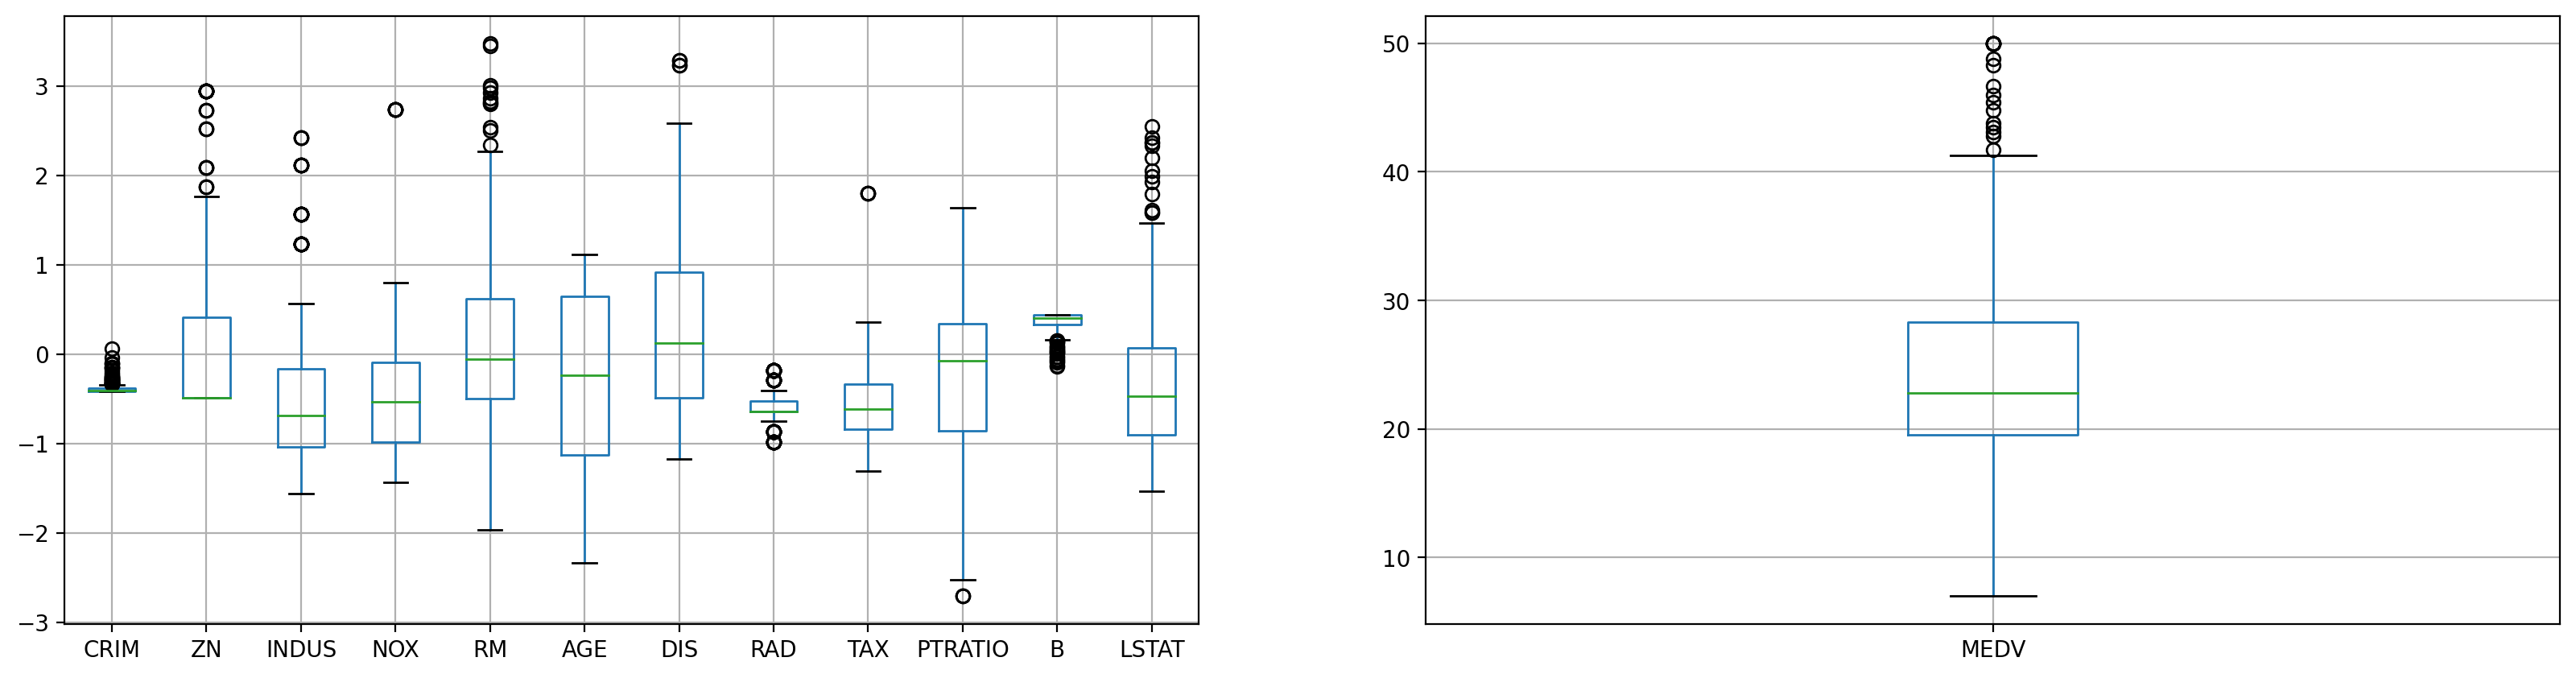

In [45]:
# features distribution after scaling

fig = plt.figure(figsize = (20,5), dpi = 200)

ax = fig.add_subplot(1,2,1)
X_df_scaled_clean.boxplot()

ax = fig.add_subplot(1,2,2)
y_df_clean.boxplot()

In [46]:
X_df_scaled_clean

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
330,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
331,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
332,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
333,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [47]:
y_df_clean

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
330,22.4
331,20.6
332,23.9
333,22.0


In [48]:
pd.concat([X_df_scaled_clean,y_df_clean], axis = 1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
331,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
332,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
333,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


# 2. Data Analysis

## 2.1 Pairwise correlations between variables 

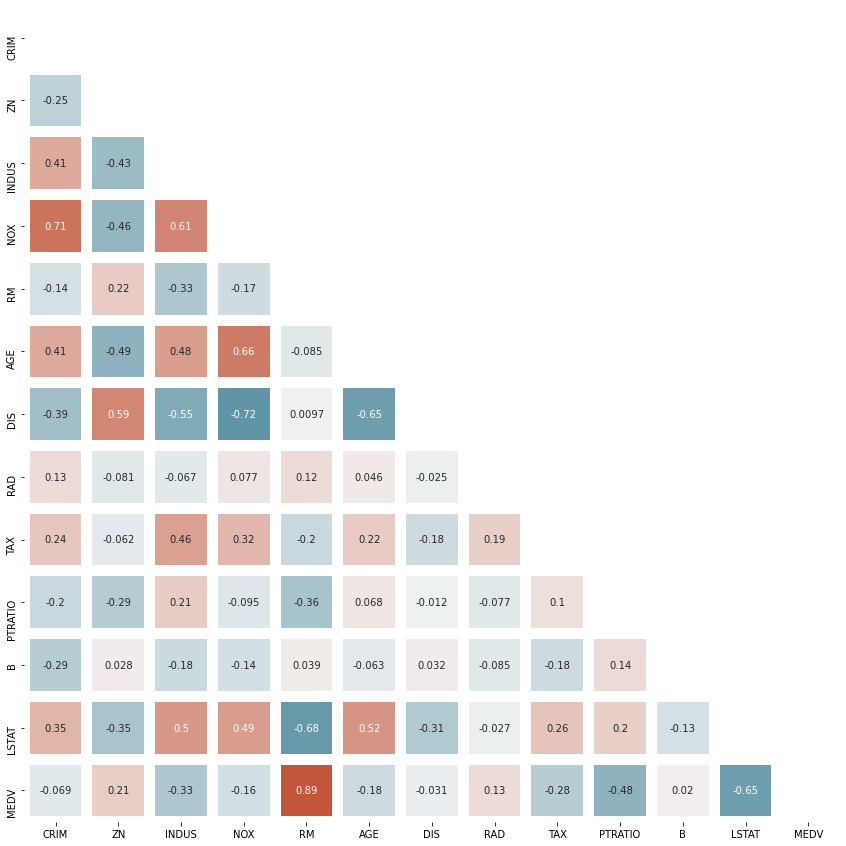

In [49]:
mask = np.zeros_like(pd.concat([X_df_scaled_clean,y_df_clean], axis = 1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(15,15))
sns.heatmap(pd.concat([X_df_scaled_clean,y_df_clean], axis = 1).corr(), mask=mask, cmap=cmap,annot=True,center=0,
            square=True, linewidths=10,cbar=None)
plt.rcParams.update({'font.size': 10})

In [50]:
#scatter = pd.plotting.scatter_matrix(X_df_scaled_clean,
#                           c = y_df_clean.values,
#                           figsize = (30,30),
#                           diagonal='kde',
#                           alpha = 1, 
#                           grid = True,
 #                          marker = 'o')


## 2.3 Train-Test Splitting

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_df_scaled_clean,y_df_clean, test_size = 0.33, random_state=42)

# 3. Anova with Backward Selection

Null hypothesis: Bj = 0 (no correlation between feature j and y)
Alernative hypothesis: Bj =! 0 (there is a correlation between j and y)

level of significance: 0.05
p-value > 0.05 : we accept the null hypothesis.
If a feature j has a p-value > 0.05 it means that Bj = 0 and there is not correlation


Backward selection: removing the features with the highest p-values (and higher than 0.0) once at a time.

In [52]:
X_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [53]:
import statsmodels.api as sm

# define a fucntion to perform backward selection

def backward_selection(X,y,alpha):
    
    # alpha: level of significance
    
    # set max p value to an arbitrary high number
    p_max = 1000
    
    # loop until max p value is higher than level of significance
    while (p_max > alpha):
    
        # fit the anove
        X_ANOVA = sm.add_constant(X)

        regressor_ANOVA = sm.OLS(endog = y,exog = X_ANOVA).fit()
        
        # get the p-values
        p_values = regressor_ANOVA.pvalues
    
        # find the max p value
        p_max = np.max(p_values)
   
        
        # drop the feature with the highest p-value
        p_max_index = np.where(p_values == p_max)[0][0]
        
        if p_max_index > 0:
            
            X = X.drop([X.columns[p_max_index - 1]], axis = 1)
                
    return X, regressor_ANOVA


def get_adj_R2(model,X,y):
    
    R2 = model.score(X,y)
    
    n = X.shape[0]
    p = X.shape[1]
    
    adj_R2 = 1 - (1 - R2)*(n - 1)/(n - p - 1)

    return adj_R2
     

In [54]:
X_df_scaled_clean

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
330,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
331,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
332,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
333,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [55]:
alpha = 0.1

X_train_bs, anova = backward_selection(X_train, y_train, alpha)

X_train_bs

,RM,AGE,DIS,TAX,PTRATIO
168,0.454987,-1.770024,1.152560,-0.850726,-1.320292
39,-0.307205,-1.016140,0.915493,-1.040783,-0.256858
237,-0.610658,-0.941463,0.301364,-1.100176,0.066796
104,-0.274438,0.953916,-0.592806,0.141134,-0.303094
262,0.086000,-1.723795,1.917048,-0.298373,-1.690182
...,...,...,...,...,...
188,0.949344,0.708548,-0.443682,-0.601276,-0.488039
71,-0.585014,-1.137046,0.336351,-0.060801,0.113032
106,-0.508082,0.697880,-0.633164,0.141134,-0.303094
270,1.617508,0.118242,-0.330782,-1.106115,-0.025677


In [56]:
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     245.4
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           9.25e-94
Time:                        15:15:30   Log-Likelihood:                -560.99
No. Observations:                 224   AIC:                             1136.
Df Residuals:                     217   BIC:                             1160.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0625      0.633     36.414      0.000      21.814      24.311
RM             6.8668      0.237     28.964      0.000       6.400       7.334
AGE           -1.4302      0.284     -5.033      0.000      -1.990      -0.870
DIS           -1.3910      0.298     -4.670      0.000      -1.978      -0.804
RAD            1.8338      1.043      1.758      0.080      -0.222       3.890
TAX           -2.1063      0.455     -4.629      0.000      -3.003      -1.209
PTRATIO       -1.2955      0.227     -5.712      0.000      -1.743      -0.848
==============================================================================
Omnibus:                       21.225   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.248
Skew:                           0.576   Prob(JB):                     9.94e-08
Kurtosis:                       4.458   Cond. No.                         9.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# get the test dataset corresponding to the subset of features selected by ANOVA

X_test_bs = X_test[X_train_bs.columns]

In [58]:
#fitting linear regression

lr = LinearRegression(fit_intercept = True)
lr.fit(X = X_train_bs, y = y_train)


adj_R2_train = get_adj_R2(lr, X_train_bs, y_train)
adj_R2_test = get_adj_R2(lr,X_test_bs, y_test)

print('Train adj R2 score: {:.3f}'.format(adj_R2_train))
print('Test adj R2 score: {:.3f}'.format(adj_R2_test))

Train adj R2 score: 0.867
Test adj R2 score: 0.795


In [82]:
lr.coef_

array([[ 6.94112536, -1.39312626, -1.35581567, -1.96974128, -1.29490898]])

# 4. Polynomial Features + ANOVA with Backward Selection


We add polynomial features to verify if adding non-linearities in the dataset improves the fitting of the linear regression. Since we expect that not all the polynomial features we add are significant, we remove the ones with high p-value by performing backward selection

In [85]:
# function to preserve the columns names in the poly features transormation
# when applying poly features, scikit-learn returns an array where the columns names are lost


from sklearn.preprocessing import PolynomialFeatures

def PolynomialFeatures_labeled(input_df,degree, constant):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 
    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)
    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    poly = PolynomialFeatures(degree)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_
    
    if not constant:
        output_nparray = output_nparray[:,1:]

        powers_nparray = powers_nparray[1:,:]
        
        index = 0


    input_feature_names = list(input_df.columns)
   
    target_feature_names = []
    
    if constant:
        
        target_feature_names = ["Constant Term"]
        index = 1
        
    for feature_distillation in powers_nparray[index :]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
        
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    
    return output_df

In [140]:
X_poly_df = PolynomialFeatures_labeled(X_df_scaled_clean, degree = 2, constant = False)

X_poly_df

,CRIM^1,ZN^1,INDUS^1,NOX^1,RM^1,AGE^1,DIS^1,RAD^1,TAX^1,PTRATIO^1,...,TAX^2,TAX^1 x PTRATIO^1,TAX^1 x B^1,TAX^1 x LSTAT^1,PTRATIO^2,PTRATIO^1 x B^1,PTRATIO^1 x LSTAT^1,B^2,B^1 x LSTAT^1,LSTAT^2
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,...,0.444367,0.972582,-0.294009,0.716979,2.128682,-0.643495,1.569246,0.194527,-0.474379,1.156834
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,...,0.974820,0.299254,-0.435464,0.486200,0.091866,-0.133680,0.149255,0.194527,-0.217191,0.242497
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,...,0.974820,0.299254,-0.391404,1.193412,0.091866,-0.120155,0.366358,0.157154,-0.479172,1.461022
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,...,1.223491,-0.125027,-0.460324,1.505994,0.012776,0.047040,-0.153895,0.173192,-0.566613,1.853728
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,...,1.223491,-0.125027,-0.487854,1.135429,0.012776,0.049853,-0.116028,0.194527,-0.452740,1.053705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,...,0.645149,-0.944951,-0.311017,0.335861,1.384072,0.455547,-0.491936,0.149937,-0.161914,0.174847
331,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,...,0.645149,-0.944951,-0.354258,0.402288,1.384072,0.518883,-0.589233,0.194527,-0.220901,0.250851
332,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,...,0.645149,-0.944951,-0.354258,0.789595,1.384072,0.518883,-1.156522,0.194527,-0.433575,0.966383
333,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,...,0.645149,-0.944951,-0.323875,0.695020,1.384072,0.474380,-1.017998,0.162590,-0.348911,0.748747


In [151]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly_df,y_df_clean, test_size = 0.33, random_state=42)

X_train_poly_bs, anova_poly_bs = backward_selection(X_train_poly,y_train,alpha = 0.0001) 

In [152]:
X_train_poly_bs

,ZN^1,AGE^1,PTRATIO^1,B^1,LSTAT^1,CRIM^1 x RM^1,CRIM^1 x RAD^1,CRIM^1 x B^1,CRIM^1 x LSTAT^1,ZN^1 x RAD^1,...,NOX^1 x TAX^1,NOX^1 x PTRATIO^1,NOX^1 x B^1,RM^1 x RAD^1,RM^1 x B^1,RM^1 x LSTAT^1,AGE^1 x TAX^1,DIS^2,DIS^1 x B^1,LSTAT^2
168,2.087452,-1.770024,-1.320292,0.219572,-1.159667,-0.190568,0.411657,-0.091966,0.485718,-2.051637,...,1.129482,1.752910,-0.291519,-0.447181,0.099902,-0.527633,1.505805,1.328394,0.253070,1.344827
39,-0.487722,-1.016140,-0.256858,0.358710,-0.434968,0.124799,0.305867,-0.145722,0.176701,0.367217,...,0.959256,0.236737,-0.330611,0.231302,-0.110198,0.133625,1.057581,0.838128,0.328396,0.189197
237,0.370669,-0.941463,0.066796,0.350596,0.048631,0.235533,0.290404,-0.135226,-0.018757,-0.279085,...,0.861937,-0.052331,-0.274676,0.459778,-0.214094,-0.029697,1.035774,0.090820,0.105657,0.002365
104,-0.487722,0.953916,-0.303094,0.441052,0.621942,0.108312,0.161041,-0.174069,-0.245461,0.199011,...,-0.009382,0.020147,-0.029318,0.111982,-0.121042,-0.170685,0.134630,0.351418,-0.261458,0.386812
262,2.516647,-1.723795,-1.690182,0.126813,-1.076964,-0.035518,0.215996,-0.052373,0.444778,-1.316210,...,0.398717,2.258602,-0.169462,-0.044978,0.010906,-0.092619,0.514333,3.675074,0.243107,1.159852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.487722,0.708548,-0.488039,0.384037,-0.412540,-0.359654,0.067480,-0.145491,0.156289,0.086873,...,0.247729,0.201075,-0.158226,-0.169097,0.364583,-0.391642,-0.426033,0.196854,-0.170391,0.170190
71,-0.487722,-1.137046,0.113032,0.431842,-0.498046,0.240299,0.214827,-0.177382,0.204576,0.255080,...,0.061816,-0.114918,-0.439049,0.305963,-0.252633,0.291364,0.069134,0.113132,0.145250,0.248050
106,-0.487722,0.697880,-0.303094,-0.128985,0.435511,0.203527,0.163452,0.051669,-0.174456,0.199011,...,-0.009382,0.020147,0.008574,0.207318,0.065535,-0.221275,0.098495,0.400897,0.081669,0.189670
270,0.928623,0.118242,-0.025677,0.441052,-0.866703,-0.666067,0.120687,-0.181619,0.356896,-0.272162,...,0.790150,0.018342,-0.315064,-0.474061,0.713405,-1.401900,-0.130790,0.109417,-0.145892,0.751175


In [153]:
anova_poly_bs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sun, 21 Feb 2021   Prob (F-statistic):          2.70e-107
Time:                        00:39:03   Log-Likelihood:                -474.63
No. Observations:                 224   AIC:                             1001.
Df Residuals:                     198   BIC:                             1090.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.1876      0.972     19.737      0.000      17.270      21.105
ZN^1                 -4.4999      0.896     -5.025      0.000      -6.266      -2.734
AGE^1                -3.5011      0.468     -7.484      0.000      -4.424      -2.579
PTRATIO^1            -1.8799      0.213     -8.829      0.000      -2.300      -1.460
B^1                  37.2568      6.533      5.703      0.000      24.375      50.139
LSTAT^1              -8.3507      1.234     -6.765      0.000     -10.785      -5.916
CRIM^1 x RM^1       -13.0983      2.103     -6.227      0.000     -17.246      -8.950
CRIM^1 x RAD^1       42.3833      9.727      4.357      0.000      23.201      61.566
CRIM^1 x B^1        114.4965     19.143      5.981      0.000      76.746     152.247
CRIM^1 x LSTAT^1    -17.7701      3.340     -5.321      0.000     -24.356     -11.184
ZN^1 x RAD^1         -6.0521      1.071     -5.652      0.000      -8.164      -3.941
ZN^1 x TAX^1          2.2468      0.533      4.218      0.000       1.196       3.297
ZN^1 x B^1            6.5736      1.612      4.078      0.000       3.395       9.752
NOX^2                -2.0553      0.320     -6.415      0.000      -2.687      -1.423
NOX^1 x RAD^1       -10.6900      1.545     -6.918      0.000     -13.737      -7.643
NOX^1 x TAX^1         6.9369      0.925      7.497      0.000       5.112       8.762
NOX^1 x PTRATIO^1    -1.4502      0.239     -6.059      0.000      -1.922      -0.978
NOX^1 x B^1         -16.0611      2.733     -5.876      0.000     -21.451     -10.671
RM^1 x RAD^1         -5.1578      0.866     -5.954      0.000      -6.866      -3.450
RM^1 x B^1          -11.9237      2.121     -5.622      0.000     -16.106      -7.741
RM^1 x LSTAT^1       -3.6879      0.387     -9.528      0.000      -4.451      -2.925
AGE^1 x TAX^1        -2.4247      0.563     -4.305      0.000      -3.535      -1.314
DIS^2                 0.8742      0.191      4.566      0.000       0.497       1.252
DIS^1 x B^1          -9.4061      1.158     -8.126      0.000     -11.689      -7.123
RAD^2               -12.3944      3.119     -3.973      0.000     -18.546      -6.243
LSTAT^2              -1.2512      0.294     -4.261      0.000      -1.830      -0.672
==============================================================================
Omnibus:                        2.661   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                2.607
Skew:                          -0.096   Prob(JB):                        0.272
Kurtosis:                       3.493   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# get the test set corresponding to the poly features selected by ANOVA

X_test_poly_bs = X_test_poly[X_train_poly_bs.columns]

In [155]:
#fitting linear regression

lr = LinearRegression(fit_intercept = True)
lr.fit(X = X_train_poly_bs, y = y_train)


adj_R2_train = get_adj_R2(lr, X_train_poly_bs, y_train)
adj_R2_test = get_adj_R2(lr,X_test_poly_bs, y_test)

print('Train adj R2 score: {:.3f}'.format(adj_R2_train))
print('Test adj R2 score: {:.3f}'.format(adj_R2_test))

Train adj R2 score: 0.928
Test adj R2 score: 0.828


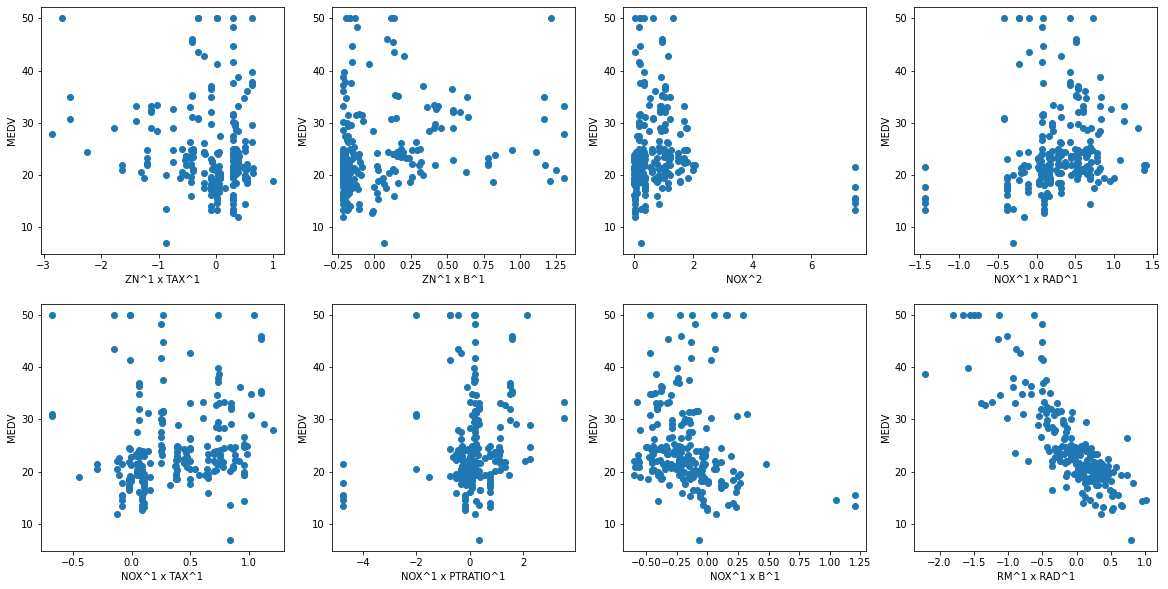

In [156]:
index = 12

fig = plt.figure(figsize = (20,10))

for i in range(8):
    
    index = 10
    
    index = index + i 
    
    fig.add_subplot(2,4, i + 1)

    f = np.array(X_train_poly_bs)[:,index]

    x = np.arange(np.min(f),np.max(f),0.01)


    plt.scatter(f, y_train)
    plt.xlabel(X_train_poly_bs.columns[index])
    plt.ylabel(y_train.columns[0])

## 2.5 Find the best number of predictors using Grid Search

In [157]:
X_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [167]:
def get_grid_search_LR(q_list,alpha_list,poly_list):

    best_adj_R2_test = 0

    for q in q_list:
    
        for alpha in alpha_list:
        
            for poly in poly_list:
                
                
                scaler = StandardScaler()
        
                X_scaled = scaler.fit_transform(X_df.values)

                X_df_scaled = pd.DataFrame(X_scaled)

                X_df_scaled.columns = X_df.columns
        
                X,y = get_remove_outliers(X_df_scaled,y_df,q)
            
                if poly:
        
                    X = PolynomialFeatures_labeled(X, degree = 2, constant = False)
            
            
                
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
                
                X_train_bs,_ = backward_selection(X_train,y_train,alpha)
                
                X_test_bs = X_test[X_train_bs.columns]
            
                lr = LinearRegression(fit_intercept = True)
                lr.fit(X = X_train_bs, y = y_train)
        
                adj_R2_train = get_adj_R2(lr,X_train_bs, y_train)
                adj_R2_test = get_adj_R2(lr,X_test_bs, y_test)
                
                
        
                if adj_R2_test > best_adj_R2_test:
            
                    best_adj_R2_test = adj_R2_test
                 
                    best_adj_R2_train = adj_R2_train
            
                    best_q = q
            
                    best_alpha = alpha
                    
                    best_poly = poly
                    
                    best_n_features = X.shape[1]
            
                    best_model = lr
                
    
    print('Best combination of parameters: ')
    print('Outliers removal - q = {}'.format(best_q))
    print('Subsest selection, level of significance - alpha = {}'.format(best_alpha))
    print('Polynomial features - {}'.format(best_poly))
    print('Best number of features - {}'.format(best_n_features))
    print('Adjusted R2 train = {:.3f}'.format(best_adj_R2_train))
    print('Adjusted R2 test = {:.3f}'.format(best_adj_R2_test))
    
    return best_model,best_q,best_alpha,best_poly,best_adj_R2_train,best_adj_R2_test

In [168]:
# let's set the possible combinations we tested (q in outliers removal,
# confidence level in the ANOVA-backward selection, polynomial features)
# in a grid search

q_list = [1.5, 3, 4, 6]
alpha_list = [0.05, 0.01, 0.005]
poly_list = ['True','False']

In [169]:
best_model,best_q,best_alpha,best_poly,best_adj_R2_train,best_adj_R2_test = get_grid_search_LR(q_list,
                                                                                               alpha_list,
                                                                                               poly_list)

Best combination of parameters: 
Outliers removal - q = 4
Subsest selection, level of significance - alpha = 0.05
Polynomial features - True
Best number of features - 90
Adjusted R2 train = 0.909
Adjusted R2 test = 0.800


In [170]:
# other approach: anova on the full dataset, then split

def get_grid_search_LR_2(q_list,alpha_list,poly_list):

    best_adj_R2_test = 0

    for q in q_list:
    
        for alpha in alpha_list:
        
            for poly in poly_list:
                
                
                scaler = StandardScaler()
        
                X_scaled = scaler.fit_transform(X_df.values)

                X_df_scaled = pd.DataFrame(X_scaled)

                X_df_scaled.columns = X_df.columns
        
                X,y = get_remove_outliers(X_df_scaled,y_df,q)
            
                if poly:
        
                    X = PolynomialFeatures_labeled(X, degree = 2, constant = False)
            
            
                X_bs,_ = backward_selection(X,y,alpha)
                
                X_train_bs, X_test_bs, y_train, y_test = train_test_split(X_bs, y, test_size = 0.33, random_state=42)
            
                lr = LinearRegression(fit_intercept = True)
                lr.fit(X = X_train_bs, y = y_train)
        
                adj_R2_train = get_adj_R2(lr,X_train_bs, y_train)
                adj_R2_test = get_adj_R2(lr,X_test_bs, y_test)
                
                
        
                if adj_R2_test > best_adj_R2_test:
            
                    best_adj_R2_test = adj_R2_test
                 
                    best_adj_R2_train = adj_R2_train
            
                    best_q = q
            
                    best_alpha = alpha
                    
                    best_poly = poly
                    
                    best_n_features = X.shape[1]
            
                    best_model = lr
                
    print('Best combination of parameters: ')
    print('Outliers removal - q = {}'.format(best_q))
    print('Subsest selection, level of significance - alpha = {}'.format(best_alpha))
    print('Polynomial features - {}'.format(best_poly))
    print('Best number of features - {}'.format(best_n_features))
    print('Adjusted R2 train = {:.3f}'.format(best_adj_R2_train))
    print('Adjusted R2 test = {:.3f}'.format(best_adj_R2_test))
    
    return best_model,best_q,best_alpha,best_poly,best_adj_R2_train,best_adj_R2_test

In [172]:
best_model,best_q,best_alpha,best_poly,best_adj_R2_train,best_adj_R2_test = get_grid_search_LR_2(q_list,
                                                                                               alpha_list,
                                                                                               poly_list)

Best combination of parameters: 
Outliers removal - q = 3
Subsest selection, level of significance - alpha = 0.01
Polynomial features - True
Best number of features - 90
Adjusted R2 train = 0.940
Adjusted R2 test = 0.892
